In [1]:
import requests
import pandas as pd
import datetime
api_key = 'fb365aa6104829b44455572365ff3b4e'

In [8]:
lat = 25
lon = 70
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [9]:
response = requests.get(api_url)
weather_data = response.json()

In [10]:
weather_data.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [11]:
weather_data['list'][0]

{'dt': 1731250800,
 'main': {'temp': 305.4,
  'feels_like': 303.42,
  'temp_min': 301.63,
  'temp_max': 305.4,
  'pressure': 1012,
  'sea_level': 1012,
  'grnd_level': 1005,
  'humidity': 21,
  'temp_kf': 3.77},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'clouds': {'all': 0},
 'wind': {'speed': 4.86, 'deg': 224, 'gust': 8.03},
 'visibility': 10000,
 'pop': 0,
 'sys': {'pod': 'n'},
 'dt_txt': '2024-11-10 15:00:00'}

In [6]:
len(weather_data['list'])

40

In [12]:
weather_data['list'][0]['weather'][0]['description']

'clear sky'

In [13]:
temperatures = [item['main']['temp'] for item in weather_data['list']]
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]
weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': temperatures,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'weather_description': weather_description,
})
weather_df.set_index('Timestamp', inplace=True)

In [14]:
max_temp = weather_df['Temperature'].max()

In [15]:
max_temp

308.51

In [16]:
min_temp = weather_df['Temperature'].min()

In [17]:
min_temp

295.46

In [18]:
weather_df.fillna(0, inplace=True)
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float) else x)   # Convert temperature from Kelvin to Celsius
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-11-10 15:00:00        32.25        21        4.86           clear sky
2024-11-10 18:00:00        29.05        32        4.65           clear sky
2024-11-10 21:00:00        24.90        48        4.34           clear sky
2024-11-11 00:00:00        23.50        53        4.02           clear sky
2024-11-11 03:00:00        25.14        61        2.41           clear sky
2024-11-11 06:00:00        33.12        23        3.26           clear sky
2024-11-11 09:00:00        35.36        16        5.10           clear sky
2024-11-11 12:00:00        33.51        16        5.14           clear sky
2024-11-11 15:00:00        27.68        28        5.02           clear sky
2024-11-11 18:00:00        25.92        52        4.44           clear sky
2024-11-11 21:00:00        24.95        57        3.83       broken clouds
2024-11-12 00:00:00      

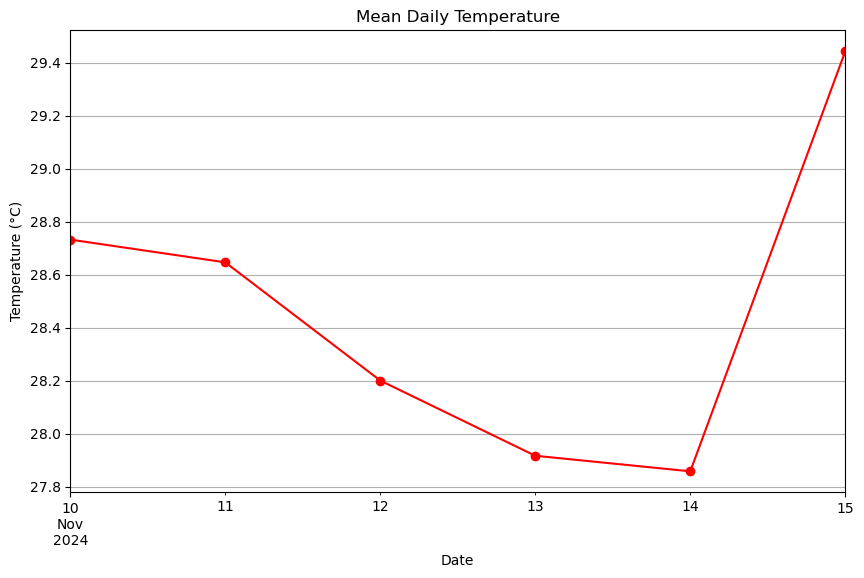

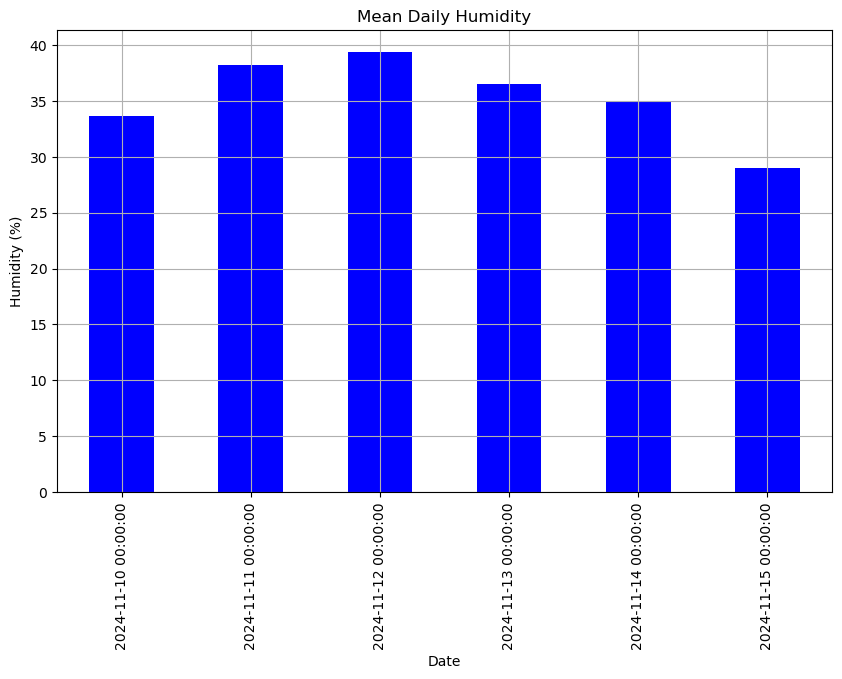

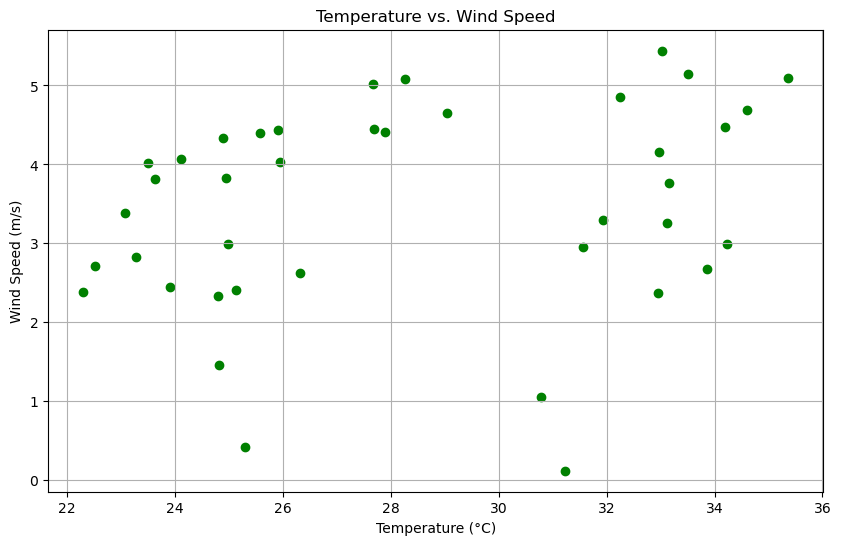

In [19]:
import matplotlib.pyplot as plt

daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

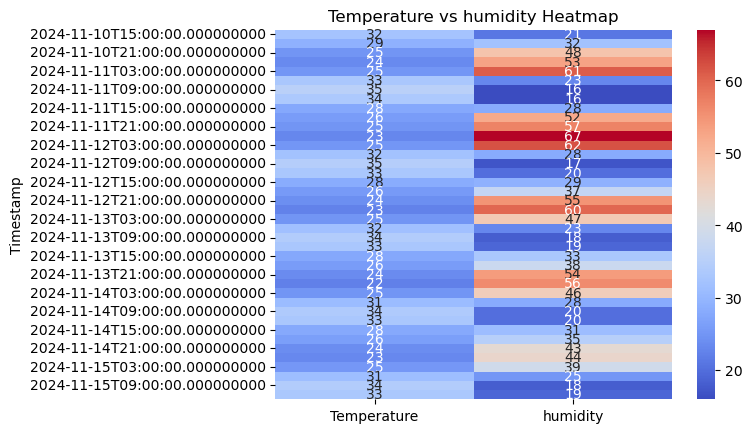

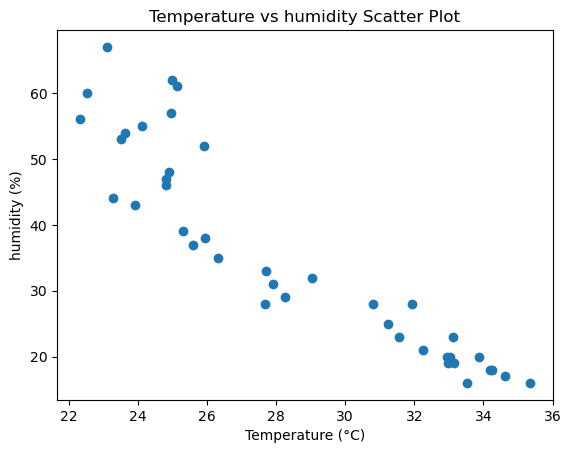

In [15]:
import seaborn as sns

heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs humidity Heatmap')
plt.show()

# Create a scatter plot to visualize the relationship between temperature and humidity
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('humidity (%)')
plt.title('Temperature vs humidity Scatter Plot')
plt.show()

In [16]:
import requests
import pandas as pd
import geopandas as gpd
import folium

# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e'

# Specify the locations for which you want to retrieve weather data
locations = ['London', 'Paris', 'New York']

weather_df = pd.DataFrame()

# Retrieve weather data for each location
for location in locations:
    # Construct the API URL
    api_url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}'

    # Send a GET request to the API
    response = requests.get(api_url)
    weather_data = response.json()

    # Extract relevant weather attributes
    temperature = weather_data['main']['temp']
    humidity = weather_data['main']['humidity']
    wind_speed = weather_data['wind']['speed']
    latitude = weather_data['coord']['lat']
    longitude = weather_data['coord']['lon']

    # Create a DataFrame for the location's weather data
    location_df = pd.DataFrame({
        'Location': [location],
        'Temperature': [temperature],
        'Humidity': [humidity],
        'Wind Speed': [wind_speed],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })

    # Append the location's weather data to the main DataFrame
    weather_df = weather_df.append(location_df, ignore_index=True)

C:\Users\visha\AppData\Local\Temp\ipykernel_2712\425209.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append(location_df, ignore_index=True)
C:\Users\visha\AppData\Local\Temp\ipykernel_2712\425209.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append(location_df, ignore_index=True)
C:\Users\visha\AppData\Local\Temp\ipykernel_2712\425209.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append(location_df, ignore_index=True)


In [17]:
weather_df

,Location,Temperature,Humidity,Wind Speed,Latitude,Longitude
0,London,283.48,85,2.06,51.5085,-0.1257
1,Paris,284.23,91,4.12,48.8534,2.3488
2,New York,281.64,57,2.06,40.7143,-74.0060
